# Lesson 7.02 DBSCAN Clustering

## Definitions
- `DBSCAN` refers to Density-based Spatial Clustering of Applications with Noise
- `Density` refers to volume of points in a specific grouping
- `Epsilon` refers to a measure of the neighbourhood
- `Neighbourhood` refers to the radius of consideration of the circle around a particular point
- `min_sample` (minPts) refers to threshold on the least number of points that we want to see in a point’s neighborhood


## Overview
- `DBSCAN` is an unsupervised ML algorithm for clustering
- It takes multi-dimensional data as inputs and clusters them according to the model parameters e.g. `epsilon` and `min_sample`
- Based on these parameters, the algorithm determines whether certain values in the dataset are outliers or not.


## Determining Parameter Values
### `min_sample`  
- As a rule of thumb, if you have a large data set then you can choose `min_sample` in the order of your dimensionality. 
    - If you are working with 10 dimensionalities then it is preferable to choose a value of `min_sample` close to 10 like 12 or 15.
    - The value of `min_sample` should be at least one greater than the number of dimensions of the dataset, i.e., `min_sample` >= Dimensions + 1.
    
    
### `epsilon`  
- Suppose you have chosen `min_sample` = 5, you will find the distance of the 5th neighbor from every data point where you will have a distance array and the ith entry in that array will represent the distance of the 5th neighbor of the ith data point. And then you are gonna sort this distance array and you are gonna plot it like this. On the y axis, you will just have the distance and on the x-axis, you will have the index (i).

- As we have sorted this, as the index will increase the distance of the 5th data point from that point will also increase. 

- The ideal `epsilon` value would be just before the increase in the distance of the 5th data point become the highest. 
    - Refer to this [link](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.datanovia.com%2Fen%2Fwp-content%2Fuploads%2Fdn-tutorials%2F005-advanced-clustering%2Ffigures%2F023-dbscan-density-based-clustering-k-nearest-neighbor-distance-1.png&f=1&nofb=1) for visualisation
    - Distance (X-axis) refers to number of points / samples
    - NN (Y-axis refers to the max distance between target point and its 5 Nearest Neigbours)


## Setting up for DBSCAN clustering to identify outliers
### Motivations
- According to a [recent report](https://www.javelinstrategy.com/coverage-area/2020-identity-fraud-study-genesis-identity-fraud-crisis?ekey=1041077962&edate=20201007&cmpgnid=em-dcp-EFLS_0002M&uniqueid=J41025338000803&lnk_loc=FOOTER), financial losses due to fraudulent transactions have reached about 17 billion USD, with as many as 5% of consumers experiencing fraud incidents of some kind.
- In light of such a big volume of financial losses, every industry is taking fraud detection seriously. 
- It’s not just the financial industries that are susceptible, anomalies are prevalent in every single industry and can take many different forms — such as network intrusion, disturbances in business performances and abrupt changes in KPIs etc.
- Fraud/anomaly/outlier detection has long been the subject of intense research in data science. 
- In the ever-changing landscape of fraud detection, new tools and techniques are being tested and employed every day to screen out abnormalities.

In this lesson, we aim to build a simple DBSCAN model to detect outliers. Do take note that a real-world application would require much more experimentation to find the best model that works for a particular context and industry.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn

from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.neighbors import NearestNeighbors

In [2]:
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Load Data

In [3]:
address = 'data/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']

# Set first 4 columns as X-values 
data = df.iloc[:,0:4].values

# Set the fifth column as y-values
target = df.iloc[:,4].values

# display first 5 rows of data frame
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Create your model and identify outliers

In [4]:
# Instantiate a DBSCAN object with key parameters specified
# eps = 0.8 means a max dist of 0.8 between 2 points in order for them to be considerd as part of same neighbourhood
# min_samples = 19 means each point must have a minimum of 19 points (inclusive of the point itself) to be considered as a core point
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)                                            

DBSCAN(eps=0.8, min_samples=19)


### Visualize your results
- Goal is to detect outliers through data visualisation.
- Note: We don't want more than 5% of our data points to be labeled as outliers

In [5]:
# goal is to check if prop of data points that are outliers are <= 5%
outliers_df = pd.DataFrame(data)

# display the total number of points for each label
print(Counter(model.labels_))

# display the specific points that are outliers i.e. label = -1
print(outliers_df[model.labels_ ==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


#### Interpreting Results
1. Counter represents how many observations have been assigned to each label (i.e. 1, 2, or -1)
2. Records with label = -1 are considered outliers 
    - 6 out of 150 total observations have been label = -1
    - This translates into an outlier proportion of 4% which is less than 5% of original data set

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

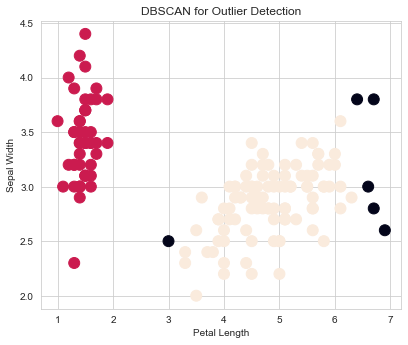

In [6]:
# create visualisation of clustering results
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

# set colours to represent respective model labels
colors = model.labels_

# display scatter plot at column index = 2 and column index = 1
# c refers to label colours which equal to model labels in this case
# s refers to the size of the scatter plot
ax.scatter(data[:,2], data[:,1], c=colors, s=120)

# set labels for axes
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

# set title fror scatter plot
plt.title('DBSCAN for Outlier Detection')

#### Interpreting Results
1. DBSCAN has identified the black labels at the extreme right as collective outliers i.e. data points appearing together in an abnormal position
2. DBSCAN has identified the red and pink labels as core samples which are generated from the dense areas of the data set

- <b>Note:</b> you may use Silhouette Score to measure the clustering quality if the dataset has well-defined clusters

### Additional: How do we find the optimal value for `epsilon`?
- We use the K-distance graph
- For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the data set 
- We obtain this using NearestNeighbors from sklearn.neighbors

In [7]:
# Select n_neighbours = (chosen value for min_samples) - 1
nn = NearestNeighbors(n_neighbors=18)
nn_model = nn.fit(data)

# The distance variable contains an array of 
# distances between a data point and its nearest data point for all data points in data set
distances, indices = nn_model.kneighbors(data)

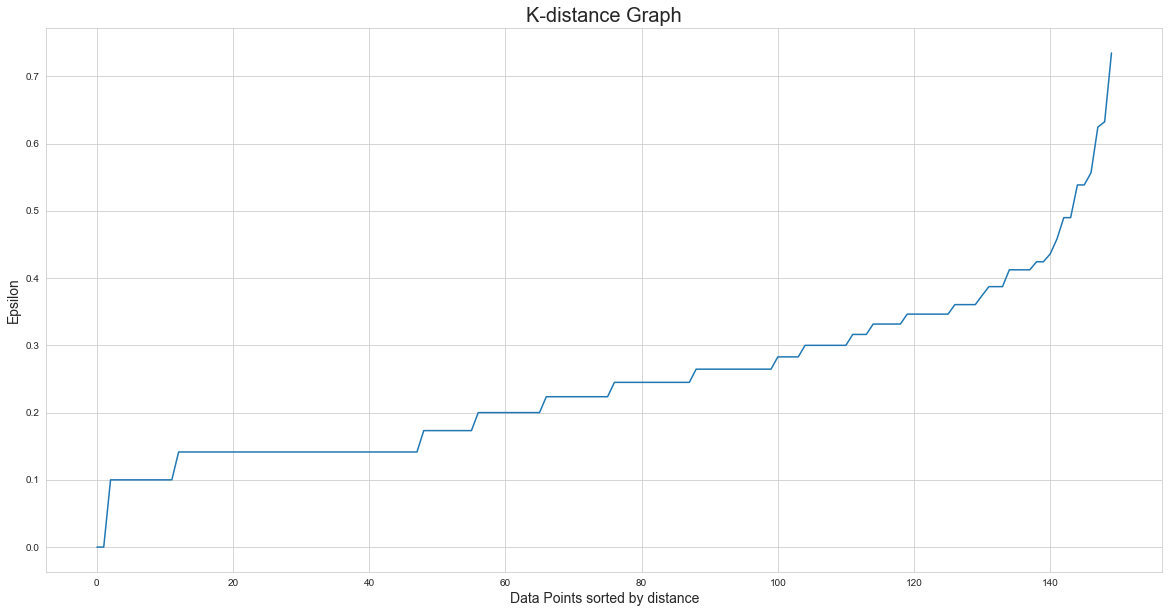

In [8]:
# Plot K-distance graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Based on the K-Distance Graph above, optimal value of `epsilon` is at the point of maximum curvature, which is around 0.7.

<b>Bonus: </b> You may also write a function to find the "elbow" or optimal epsilon value

In [12]:
# Find the best epsilon value excluding 0.0
def find_best_epsilon(k_distances):
    
    # Exclude epsilon 0.0
    nonzero_epsilons = k_distances[k_distances > 0.0]
    
    # Compute differences between consecutive k-distances i.e. first derivative
    
    # The first derivative of the k-distances captures the rate of change of the curve. 
    # It indicates how quickly the k-distances are increasing as we move along the x-axis (data point index). 
    # However, the first derivative alone may not clearly distinguish the knee/elbow point because it can have fluctuations or noise.
    differences = np.diff(nonzero_epsilons)
    
    # Calculate the second derivative of differences
    
    # The second derivative provides information about the rate of change of the first derivative. 
    # It helps to identify points of inflection, where the curvature of the curve changes. 
    # In the context of the k-distance graph, the second derivative identifies the point where the rate of change of the first derivative is maximized. 
    # This corresponds to the knee/elbow point, which is the transition point of the curve.
    second_derivative = np.diff(differences)
    
    # By examining the second derivative, we can locate the knee/elbow point more reliably. 
    # The maximum value of the second derivative indicates the position where the curve changes its concavity, 
    # signifying the optimal epsilon value. It helps to distinguish the significant change in the slope of the k-distance graph, 
    # providing a more robust criterion for selecting the best epsilon value.
    
    # Find the knee/elbow point as the maximum second derivative
    best_index = np.argmax(second_derivative)
    
    # Add 1 to account for the index shift
    
    #When calculating the differences and the second derivative of the k-distances, 
    # we remove the first element (index 0) from the k-distances array because the differences and second derivative are based on the change between consecutive elements. As a result, 
    # the second derivative will have one less element compared to the original k-distances.
    best_epsilon = nonzero_epsilons[best_index + 1] 
    return best_epsilon


# Invoke function
best_epsilon = find_best_epsilon(distances)

# Print the best epsilon
print("Best Epsilon:", best_epsilon)

Best Epsilon: 0.6324555320336759
